In [1]:
import soundfile as sf
import numpy as np
from scipy import stats
import matplotlib as plt
import torch
from fairseq.models.wav2vec import Wav2VecdecoderModel, Wav2VecAutoEncoderModel

In [182]:
# ./w2v_thn/decoder/0118like_en_arch/checkpoint_last.pt
# './w2v_thn/0119_big_lr/checkpoint_best.pt'
# './w2v_thn/decoder/0119_big_lr_small_sample/checkpoint_last.pt'
cp = torch.load('./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_10dB_MSE_local2P/checkpoint_last.pt')
model = Wav2VecAutoEncoderModel.build_model(cp['cfg']['model'], task=None)
model.load_state_dict(cp['model'])
model.eval()

Wav2VecAutoEncoderModel(
  (feature_extractor): ConvFeatureExtractionModel(
    (conv_layers): ModuleList(
      (0): Sequential(
        (0): ConvTranspose1d(8, 8, kernel_size=(1,), stride=(1,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 8, eps=1e-05, affine=True)
      )
      (1): Sequential(
        (0): ConvTranspose1d(8, 8, kernel_size=(2,), stride=(1,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 8, eps=1e-05, affine=True)
      )
      (2): Sequential(
        (0): ConvTranspose1d(8, 8, kernel_size=(4,), stride=(1,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Fp32GroupNorm(1, 8, eps=1e-05, affine=True)
      )
      (3): Sequential(
        (0): ConvTranspose1d(8, 1, kernel_size=(1,), stride=(1,), bias=False)
        (1): Dropout(p=0.0, inplace=False)
        (2): Tanh()
      )
    )
  )
  (feature_aggregator): ConvAggegator(
    (conv_layers): Sequential(
      (0): Seq

In [18]:
model2 =  model

In [25]:
para2 = cp['model']

In [73]:
para2['feature_aggregator.conv_layers.0.1.weight'].view(-1)

tensor([ 0.1261,  0.2018,  0.1799, -0.3098, -0.4871, -0.1843,  0.0101, -0.1870],
       device='cuda:0', dtype=torch.float16)

In [74]:
model.state_dict()['feature_aggregator.conv_layers.0.1.weight'].view(-1)

tensor([ 0.1261,  0.2018,  0.1799, -0.3098, -0.4871, -0.1843,  0.0101, -0.1870])

### 加载模型

In [160]:
def fl_two(m1: str, m2:str):
    cp1 = torch.load(m1)scp2['cfg']['model'], task=None)
    
    para1 = cp1['model']
    para2 = cp2['model']
    
    for key in para1.keys():
#         print("before FL", para1[key].shape, "\n", para1[key].view(-1), "\n", para2[key].view(-1))

        para1[key] = (para1[key] + para2[key]) / 2
#         print("after FL", para1[key].shape, "\n", para1[key].view(-1))
    
#     cp3 = cp1
#     cp3['model'] = para1
    
#     model = Wav2VecAutoEncoderModel.build_model(cp1['cfg']['model'], task=None)
    model1.load_state_dict(para1)
    
#     model.dropout_feats_en = model1.dropout_feats_en
#     model.dropout_agg_en = model1.dropout_agg_en
#     model.dropout_feats = model1.dropout_feats
#     model.dropout_agg = model1.dropout_agg
    
    return model1
    
#     model3 = 
    
    
    

In [84]:
model = fl_two('./w2v_thn/FL_AutoEncoder/0301_time_div4_feat8_6dB_NR_FL2/checkpoint_best.pt', \
                   './w2v_thn/FL_AutoEncoder/0301_time_div4_feat8_6dB_NR_FL2/checkpoint_best.pt')

In [132]:
model = fl_two('./w2v_thn/FL_AutoEncoder/0302_tdiv1_feat8_6dB_MSE_FL1/checkpoint_last.pt', \
                   './w2v_thn/FL_AutoEncoder/0302_tdiv1_feat8_6dB_MSE_FL1/checkpoint_last.pt')

In [238]:
model = fl_two('./w2v_thn/FL_AutoEncoder/0302_tdiv1_feat2_10dB_MSE_100eFL1/checkpoint_last.pt', \
                   './w2v_thn/FL_AutoEncoder/0302_tdiv1_feat2_10dB_MSE_100eFL2/checkpoint_last.pt')

In [354]:
#  FL model
model = fl_two('./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_10eFL1/checkpoint_last.pt', \
                   './w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_10eFL2/checkpoint_last.pt')

In [402]:
# local model
model = fl_two('./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local1P/checkpoint_last.pt', \
                   './w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local1P/checkpoint_last.pt')

In [40]:
model.state_dict().keys()

odict_keys(['feature_extractor.conv_layers.0.0.weight', 'feature_extractor.conv_layers.0.2.weight', 'feature_extractor.conv_layers.0.2.bias', 'feature_extractor.conv_layers.1.0.weight', 'feature_extractor.conv_layers.1.2.weight', 'feature_extractor.conv_layers.1.2.bias', 'feature_extractor.conv_layers.2.0.weight', 'feature_extractor.conv_layers.2.2.weight', 'feature_extractor.conv_layers.2.2.bias', 'feature_extractor.conv_layers.3.0.weight', 'feature_aggregator.conv_layers.0.1.weight', 'feature_aggregator.conv_layers.0.1.bias', 'feature_aggregator.conv_layers.0.3.weight', 'feature_aggregator.conv_layers.0.3.bias', 'feature_aggregator.conv_layers.1.1.weight', 'feature_aggregator.conv_layers.1.1.bias', 'feature_aggregator.conv_layers.1.3.weight', 'feature_aggregator.conv_layers.1.3.bias', 'feature_aggregator.conv_layers.2.1.weight', 'feature_aggregator.conv_layers.2.1.bias', 'feature_aggregator.conv_layers.2.3.weight', 'feature_aggregator.conv_layers.2.3.bias', 'feature_aggregator.conv_l

###  加载音频

In [409]:
import soundfile as sf
import numpy as np
from scipy import stats
import matplotlib as plt
fname = '/home/thn/audio_dataset/LibriSpeech/thn_train_clean/84-121550-0034.flac'
# fname = '/home/thn/audio_dataset/LibriSpeech/dev-other/116/288045/116-288045-0000.flac'
# fname = '/home/thn/audio_dataset/LibriSpeech/dev-clean/174/50561/174-50561-0000.flac'

wav, curr_sample_rate = sf.read(fname)
# feats = torch.from_numpy(wav).float()
wav_t = wav *5 /3 + 0.5
source = torch.from_numpy(wav).float().view(1, -1)

### Pass model

In [488]:
# Encoder, Transmitter 
source_ = source 
T_a = model.feature_extractor_en(source_)
T_a_ = model.dropout_feats_en(T_a)
print("|*****T_a_S:|", T_a_.shape)
X = model.feature_aggregator_en(T_a_)
X = model.dropout_agg_en(X)
print("|*******X_S:|", X.shape)

# Channel layer

import math
import numpy as np
SNR = 20 # dB # SNR = 10 log（s/n） = 6
P_noise = 0.2 /math.sqrt(10**(SNR/10))
P_noise = torch.tensor(P_noise).half()
# [r1,r2,r3] = X.shape 
# noise = np.random.randn(r1,r2,r3)
noise = torch.randn(X.shape).half()
# print(X.type(), torch.from_numpy(noise).float().cuda().type(), P_noise.type())
# Y = X + torch.from_numpy(noise).half().cuda() * P_noise.cuda()
Y = X + noise * P_noise

# —————————— No Noise Channel ————————-
# Y  = X

# ——————————  Decoder, Receiver ———————
print("In the Channel Y_S", Y.shape)
features = model.feature_aggregator(Y)
# x = self.dropout_agg(feature)

features_ = model.dropout_agg(features)
x = model.feature_extractor(features_)
print("|in decoder model, out feature_extractor|", x.shape)
x_ = model.dropout_feats(x)
# x_ = x_ - 1

|*****T_a_S:| torch.Size([1, 8, 143116])
|*******X_S:| torch.Size([1, 8, 143116])
In the Channel Y_S torch.Size([1, 8, 143116])
|in decoder model, out feature_extractor| torch.Size([1, 1, 143120])


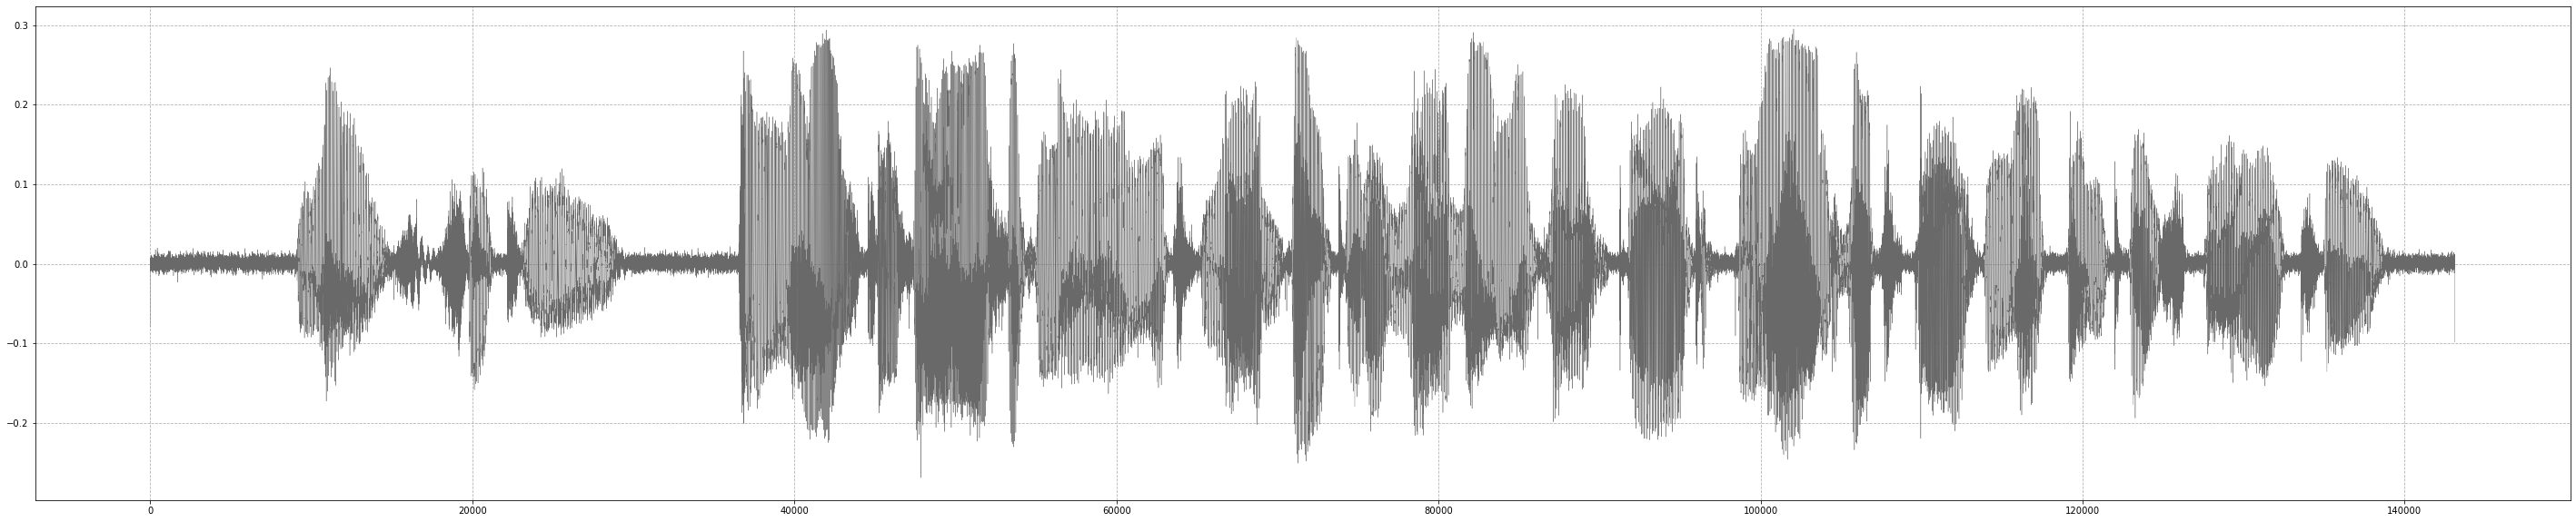

In [471]:
plot_curve((x_.view(-1)).detach().numpy())# model_comb

In [489]:
NRMSE(x_[:,:,:] * 0.93, source) # FL_comb

output, source, minlen= 143120 143120 143120
0.00012905


'0.00012905'

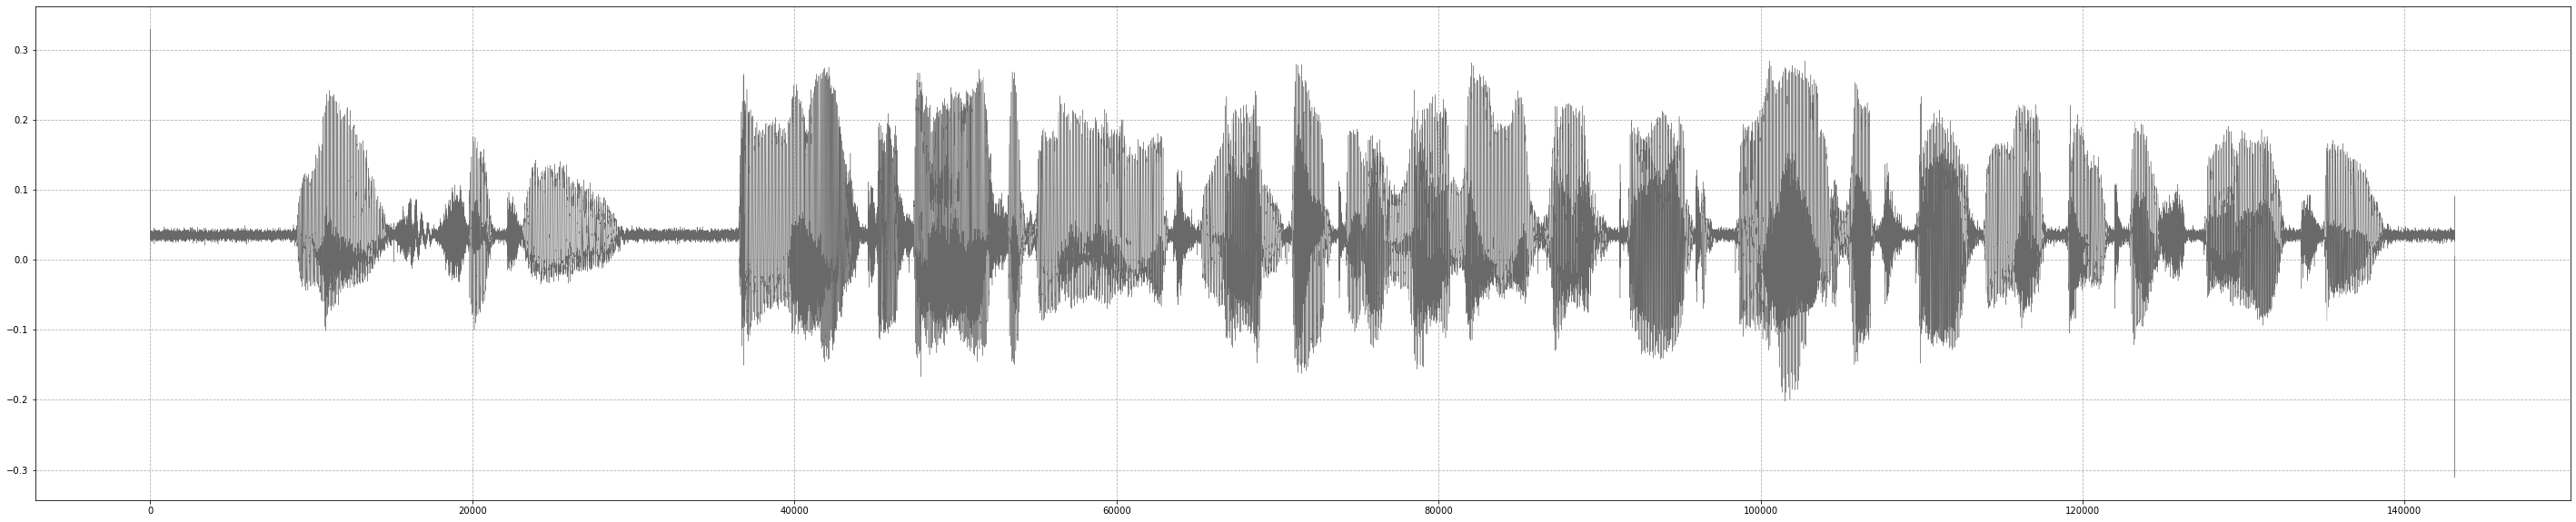

In [228]:
plot_curve((x_.view(-1)).detach().numpy())# local model_1

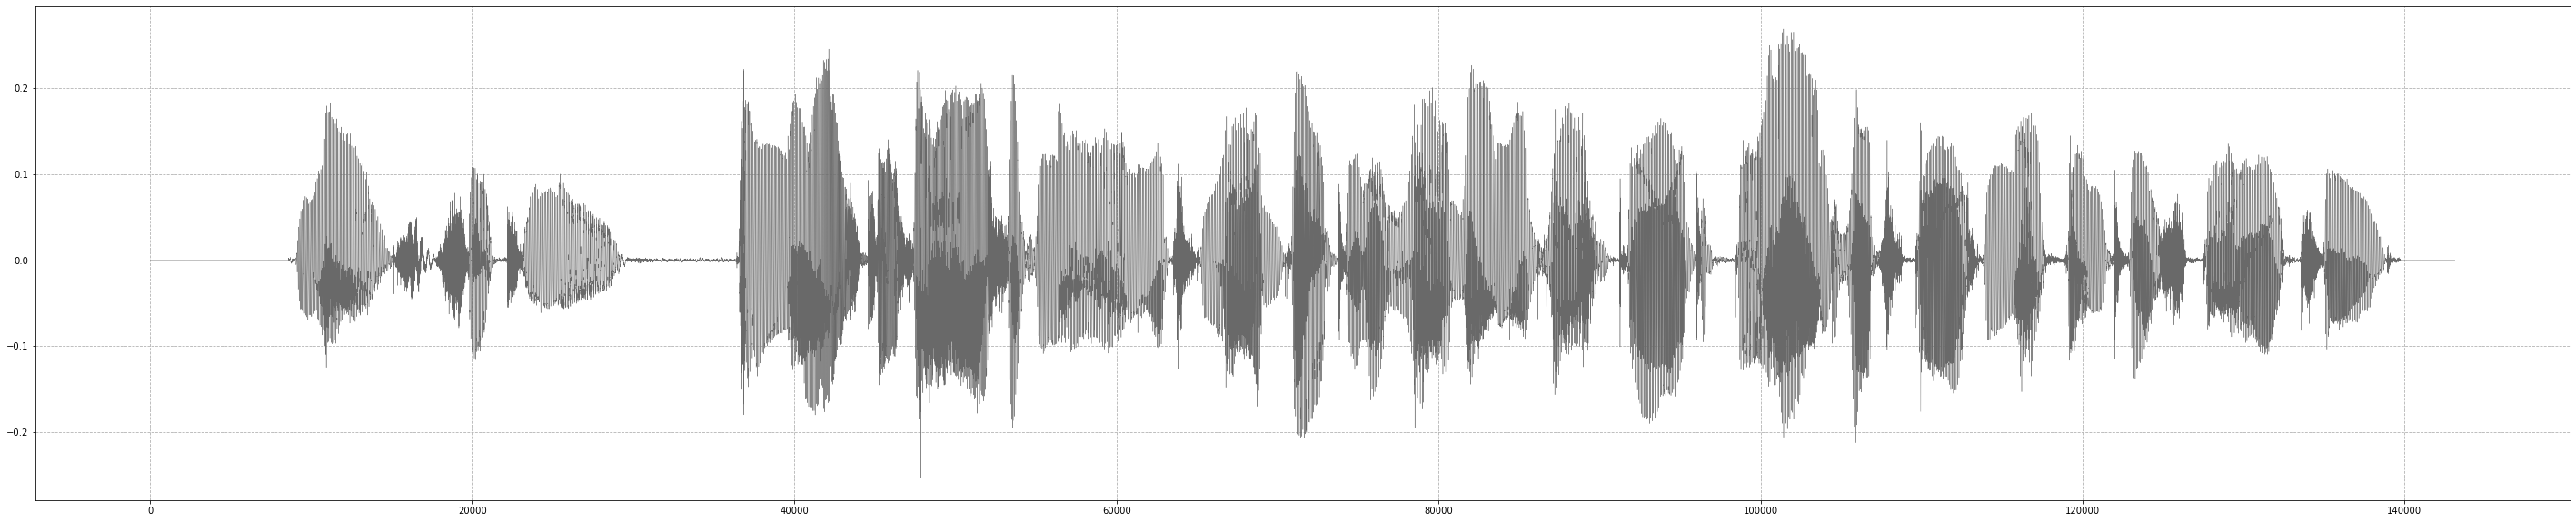

In [424]:
plot_curve((source.view(-1)).detach().numpy())

In [224]:
NRMSE(x_[:,:,:] , source) # FL_comb

output, source, minlen= 143120 143120 143120
0.00033878


/home/titan/anaconda3/envs/thn/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


'0.00033878'

In [ ]:
# Encoder, Transmitter 
source_ = source 
T_a2 = model2.feature_extractor_en(source_)
T_a_2 = model2.dropout_feats_en(T_a2)
print("|*****T_a_S:|", T_a_2.shape)
X2 = model2.feature_aggregator_en(T_a_2)
X2 = model2.dropout_agg_en(X)
print("|*******X_S:|", X2.shape)

# Channel layer

import math
import numpy as np
SNR = 6 # dB # SNR = 10 log（s/n） = 6
P_noise = 0.2 /math.sqrt(10**(SNR/10))
P_noise = torch.tensor(P_noise).half()
# [r1,r2,r3] = X.shape 
# noise = np.random.randn(r1,r2,r3)
noise = torch.randn(X.shape).half()
# print(X.type(), torch.from_numpy(noise).float().cuda().type(), P_noise.type())
# Y = X + torch.from_numpy(noise).half().cuda() * P_noise.cuda()
Y2 = X2 + noise * P_noise

# —————————— No Noise Channel ————————-
# Y  = X

# ——————————  Decoder, Receiver ———————
print("In the Channel Y_S", Y2.shape)
features2 = model2.feature_aggregator(Y2)
# x = self.dropout_agg(feature)

features_2 = model2.dropout_agg(features2)
x2 = model2.feature_extractor(features_2)
print("|in decoder model, out feature_extractor|", x2.shape)
x_2 = model2.dropout_feats(x2)
# x_ = x_ - 1

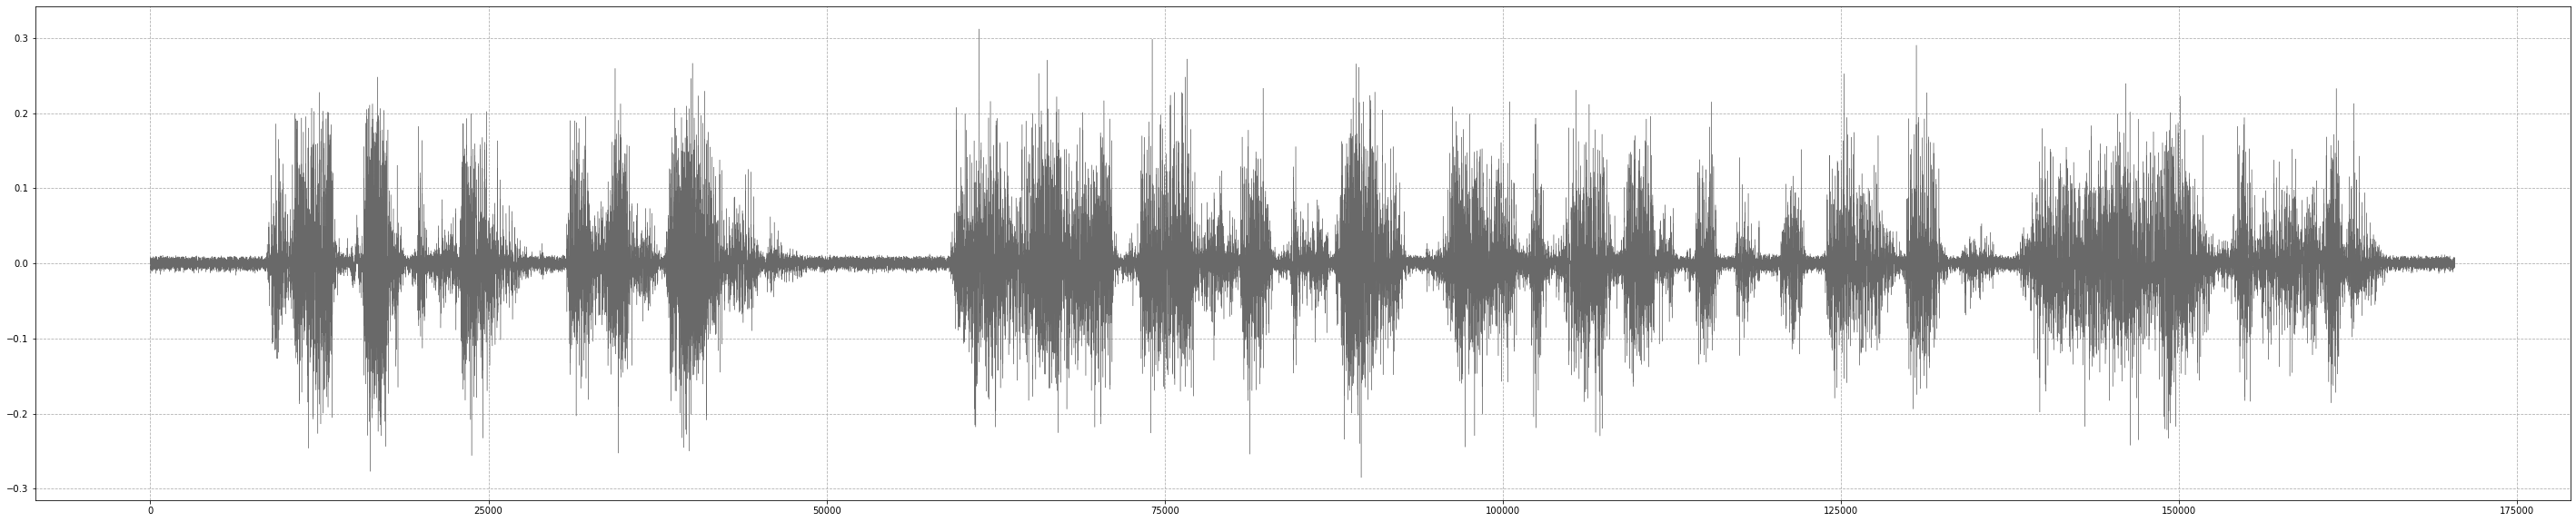

In [13]:
plot_curve((x_.view(-1)).detach().numpy())# P1

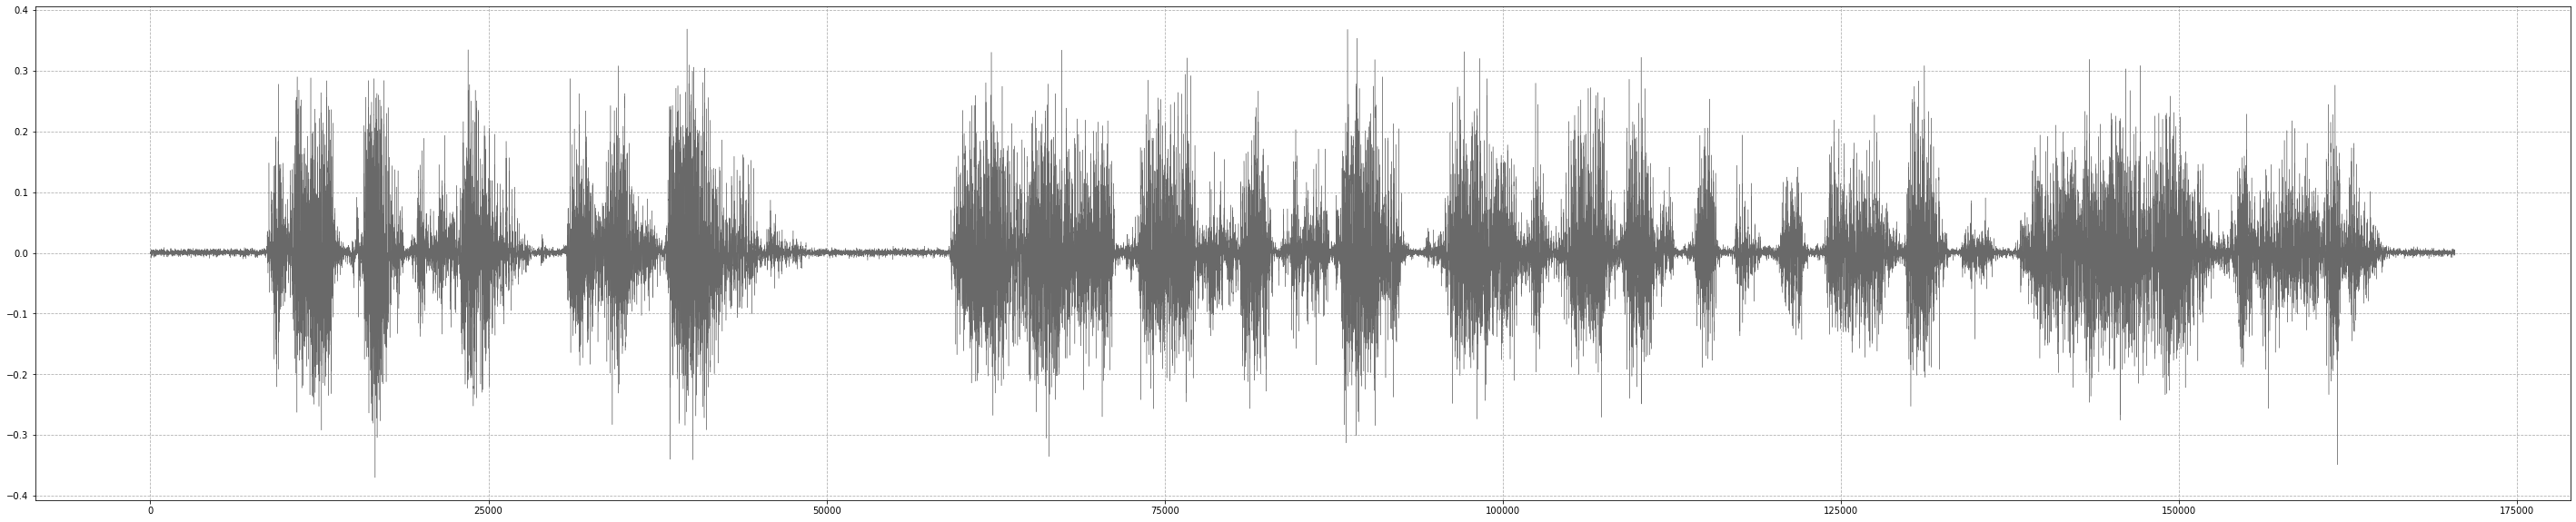

In [46]:
plot_curve((x_.view(-1)).detach().numpy())# P2

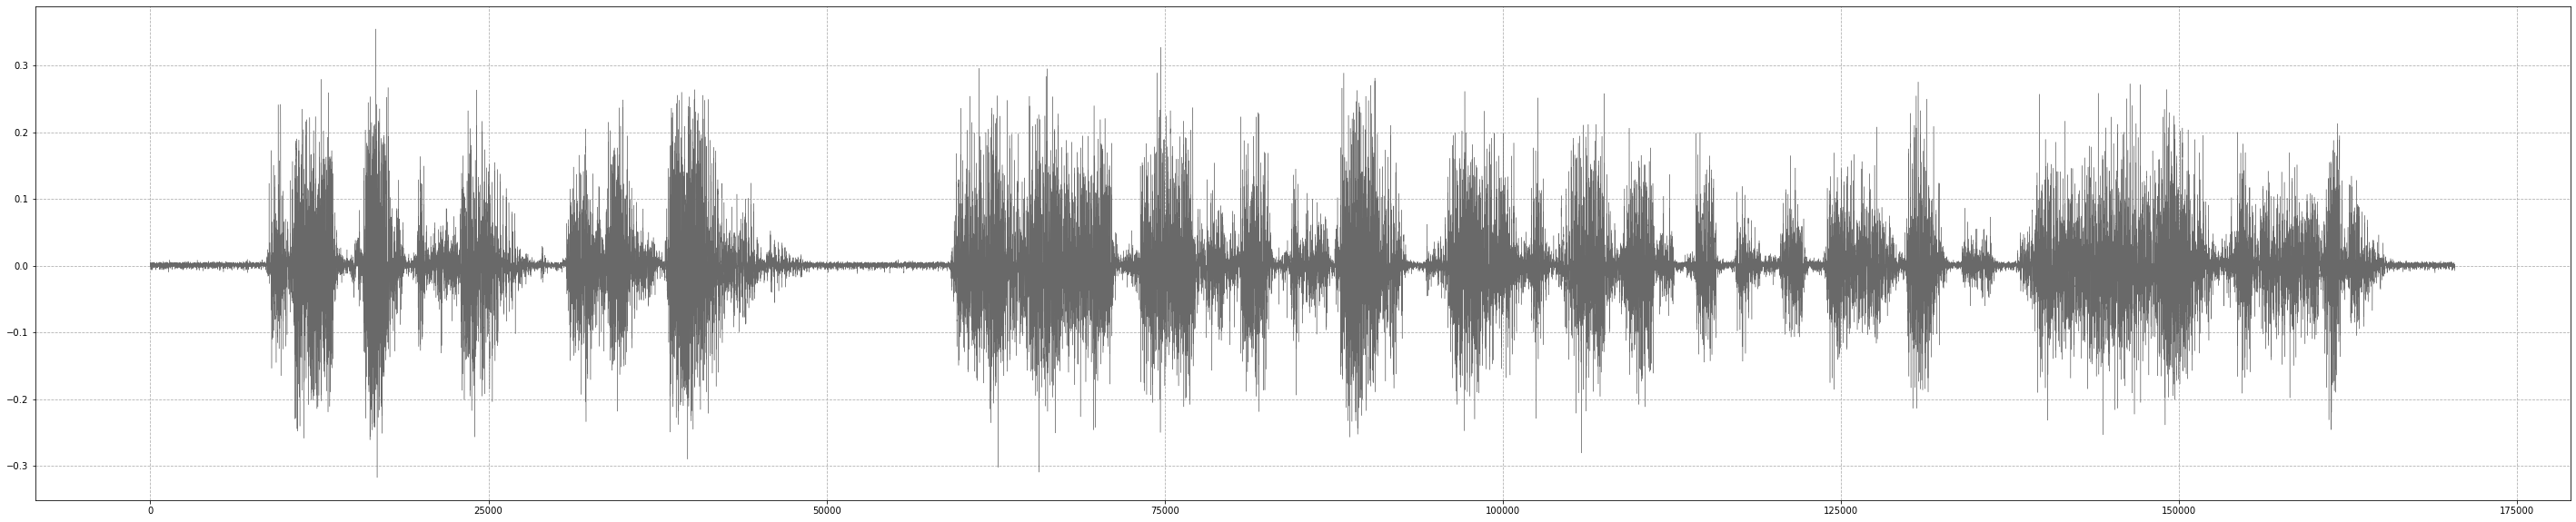

In [260]:
plot_curve((x_.view(-1)).detach().numpy())# Combined output

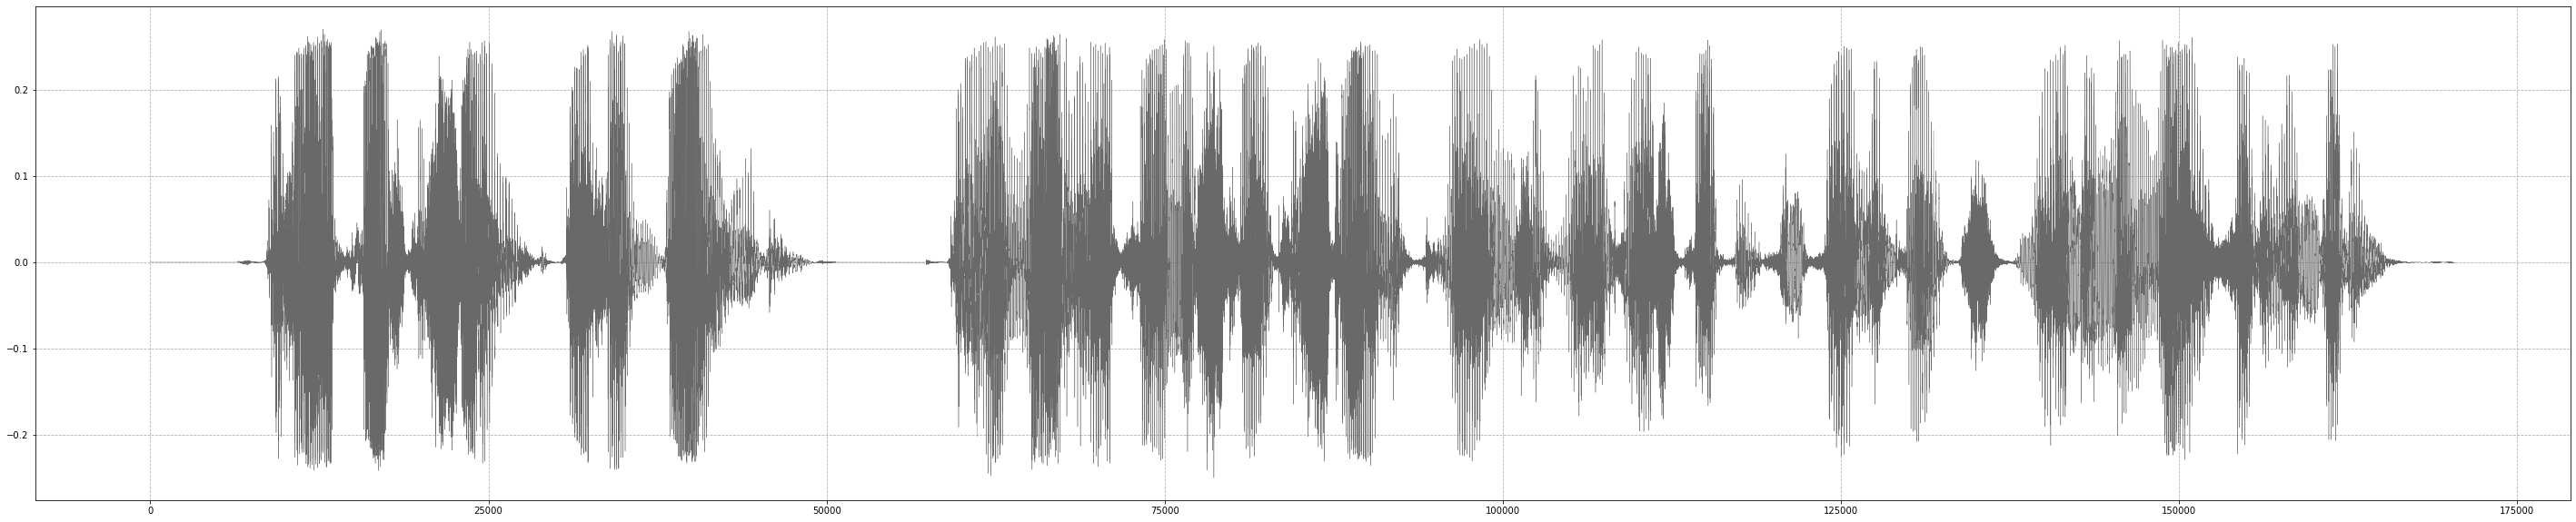

In [267]:
plot_curve((source.view(-1)).detach().numpy())

In [151]:
NRMSE(x_[:,:,:]*0.5 , source) # FL_comb

output, source, minlen= 170400 170400 170400
0.00130948


'0.00130948'

In [128]:
NRMSE(x_[:,:,:] * 1.1, source) # FL_1

output, source, minlen= 170400 170400 170400
0.00308131


/home/titan/anaconda3/envs/thn/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


'0.00308131'

In [187]:
NRMSE(x_[:,:,:] * 1.1, source) # FL_2

output, source, minlen= 170400 170400 170400
0.00026698


/home/titan/anaconda3/envs/thn/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


'0.00026698'

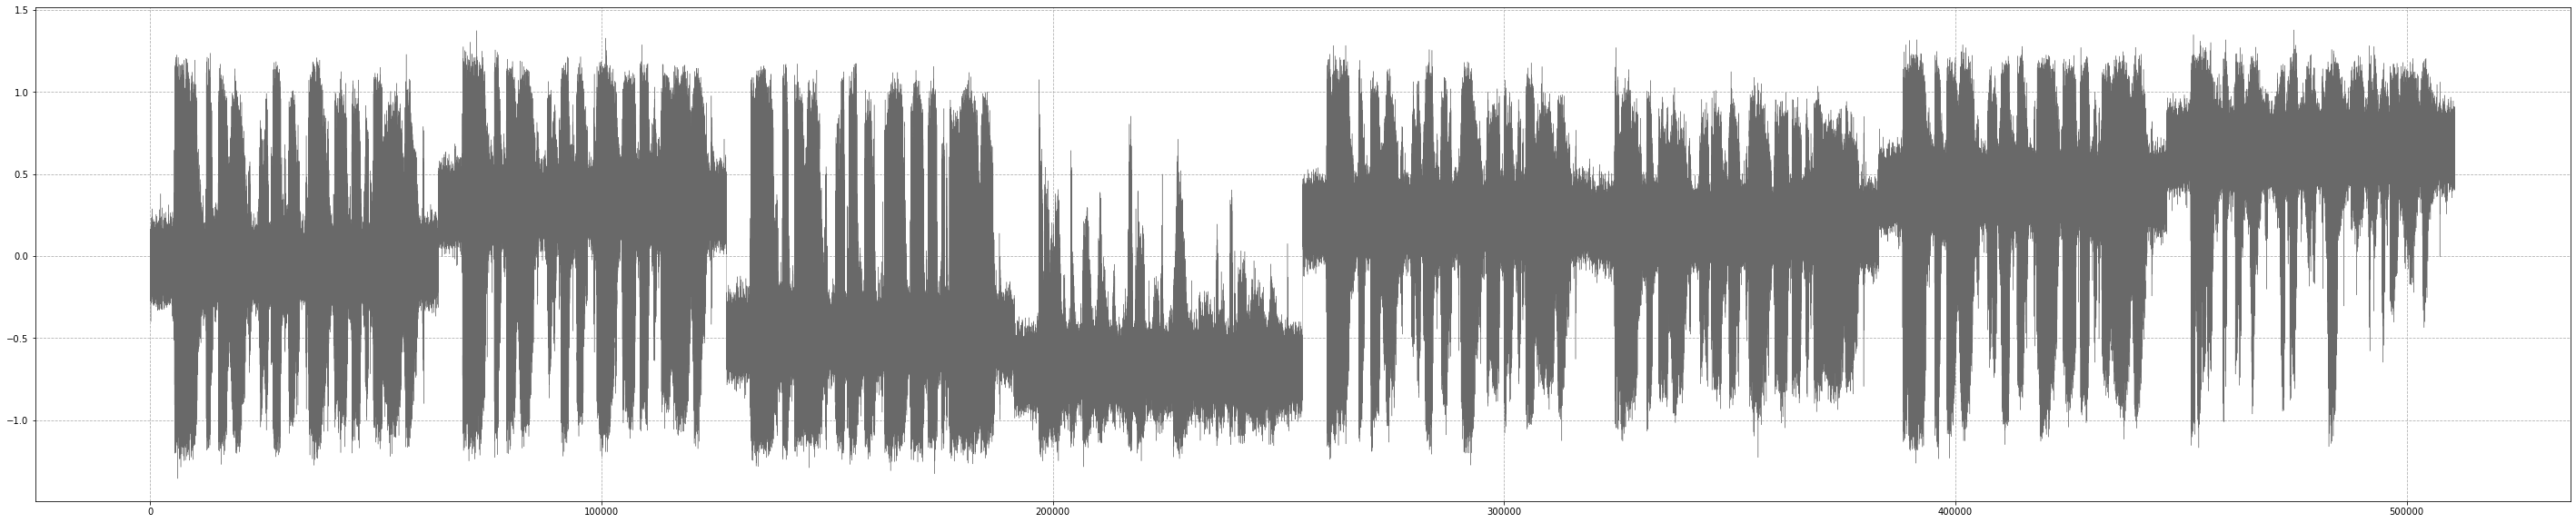

In [215]:
plot_curve((Y.view(-1)).detach().numpy())# original output

In [205]:
sf.write('A_0302_tdiv1_feat8_10dB.flac', x_.view(-1).detach().numpy(), 16000)

In [169]:
max(X.view(-1)[:10000])

tensor(2.0000, grad_fn=<UnbindBackward>)

In [168]:
X.shape

torch.Size([1, 8, 170396])

In [6]:
#  定义绘制一维向量的函数
def plot_curve(y: np.ndarray, i = 0, j = 0) -> None:
    import matplotlib.pyplot as plt
    import matplotlib
    x = np.arange(0,len(y))
    if j == 0: 
        j = len(y)      
    # i = 10000
    # l = 50000
    plt.figure(1)
    plt.plot(x[i: i + j], y[i: i + j],'k',color='#696969', linewidth=0.4, linestyle="-") 
    plt.rcParams['figure.figsize'] = (50.0, 10.0) # 设置figure_size尺寸
    plt.grid(ls='--')#标尺，on：有，off:无。
#     plt.savefig('fig_source.eps', dpi=600, format='eps')
#     plt.savefig('fig_source.png')
    plt.show() #展示绘图


In [7]:
def NRMSE(output: torch.tensor, source: torch.tensor):
    import torch 
    loss_func = torch.nn.MSELoss(reduce=True, size_average=True)
    output, source = output.view(-1), source.view(-1)
    min_len = min(len(output), len(source))
    print("output, source, minlen=", len(output), len(source), min_len)
    loss = loss_func(output[:min_len], source[:min_len]) #/ source.mul(source).mean() #
    print("%.8f"%loss)
    return "%.8f"%loss
    